In [6]:
data = pd.read_csv('ex2data2.txt')
data


,test1,test2,y
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
X_values = data[['test1', 'test2']].to_numpy()
y_values = data[['y']].to_numpy()


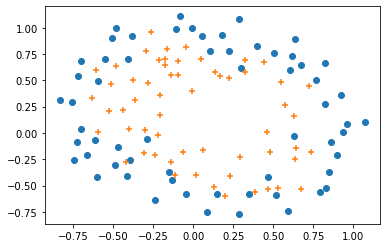

In [9]:
pos, neg = (y_values == 1), (y_values == 0)
plt.scatter(X_values[neg[:,0],0], X_values[neg[:,0],1], marker = "o")
plt.scatter(X_values[pos[:,0],0], X_values[pos[:,0],1], marker = "+")

In [10]:
def man_features(x1, x2, degree):
    x = np.ones((len(x1), 1))
    #x = np.hstack((x1, x2))
    for i in range(1, degree+1):
        for j in range(i+1):
            x_new = x1**(i - j) * x2**(j)
            x = np.hstack((x, x_new))
    return x

X = man_features(X_values[:,0].reshape((118,1)), X_values[:,1].reshape((118,1)), 6)       #(118, 28)
y = y_values            
theta =  np.zeros((28,1))        

In [11]:
#out = np.ones((len(y), 1))
def sigmoid(z):
    return 1/(1 + np.exp(-z))



In [12]:
def cost_Function(X, Y, theta, lamda):
    m = len(Y)
    small_value = np.full((1, 1) ,0.00000000000000000000000000000000001)
    
    h_x = sigmoid(np.dot(X, theta))#(100, 1)
    
    cost = (Y) * np.log(h_x+small_value) + (1 - Y) * np.log(1 - h_x + small_value)
    j = (-1/m) * sum(cost)
    
    reg_j = j + (lamda/(2*m)) * sum(theta[1:] ** 2)
    
    grad_term_zero = (1/m) * (np.dot(X.transpose()[0],(h_x - Y)))
    grad_term_one  = (1/m)*(np.dot(X.transpose()[1:],(h_x - Y))) + (lamda/m)*theta[1:]
    
    
    return reg_j[0], grad_term_zero, grad_term_one

j, g0, g1 = cost_Function(X, y, theta, 0.2)

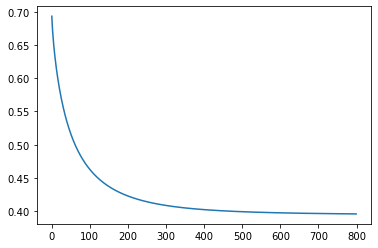

In [13]:
def gradient_descent(X, Y, theta, alpha, num_iter, lamda):
    
    j_history = []
    
    for i in range(num_iter):
        j, g0, g1 = cost_Function(X, Y, theta, lamda)
        theta[0] = theta[0] - alpha*g0
        theta[1:] = theta[1:] - alpha*g1
        j_history.append(j)
        
    return theta, j_history


theta, j_history = gradient_descent(X, y, theta, 1, 800, 0.1)
plt.plot(j_history)

In [14]:
def predict(X, theta):
    prediction = sigmoid(X@theta)
    return prediction >= 0.5



p = predict(X, theta)

In [15]:
sum(p == y)/len(y)

array([0.83050847])

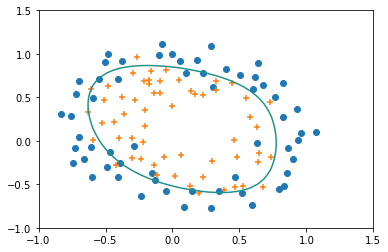

In [16]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out


plt.scatter(X_values[neg[:,0],0], X_values[neg[:,0],1], marker = "o")
plt.scatter(X_values[pos[:,0],0], X_values[pos[:,0],1], marker = "+")

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta
plt.contour(u_vals,v_vals,z.T,0)

In [17]:
np.full((1, 1) ,0.00000000000000000000000000000000001)

array([[1.e-35]])

In [18]:
X.shape

(118, 28)

In [19]:
theta.shape


(28, 1)

In [21]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    